In [1]:
import gym
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from collections         import deque
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
class Agent():
    def __init__(self, state_size, action_size):
        self.weight_backup      = "cartpole_weight.h5"
        self.state_size         = state_size
        self.action_size        = action_size
        self.memory             = deque(maxlen=2000)
        self.learning_rate      = 0.001
        self.gamma              = 0.95
        self.exploration_rate   = 1.0
        self.exploration_min    = 0.01
        self.exploration_decay  = 0.995
        self.brain              = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))

        if os.path.isfile(self.weight_backup):
            model.load_weights(self.weight_backup)
            self.exploration_rate = self.exploration_min
        return model

    def save_model(self):
            self.brain.save(self.weight_backup)

    def act(self, state):
        if np.random.rand() <= self.exploration_rate:
            return random.randrange(self.action_size)
        act_values = self.brain.predict(state)
        return np.argmax(act_values[0])

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, sample_batch_size):
        if len(self.memory) < sample_batch_size:
            return
        sample_batch = random.sample(self.memory, sample_batch_size)
        for state, action, reward, next_state, done in sample_batch:
            target = reward
            if not done:
              target = reward + self.gamma * np.amax(self.brain.predict(next_state)[0])
            target_f = self.brain.predict(state)
            target_f[0][action] = target
            self.brain.fit(state, target_f, epochs=1, verbose=0)
        if self.exploration_rate > self.exploration_min:
            self.exploration_rate *= self.exploration_decay

In [5]:
class CartPole:
    def __init__(self):
        self.sample_batch_size = 32
        self.episodes          = 250
        self.env               = gym.make('CartPole-v1')

        self.state_size        = self.env.observation_space.shape[0]
        self.action_size       = self.env.action_space.n
        self.agent             = Agent(self.state_size, self.action_size)


    def run(self):
        outputs = []
        try:
            for index_episode in range(self.episodes):
                state = self.env.reset()
                state = np.reshape(state, [1, self.state_size])

                done = False
                index = 0
                while not done:
#                    self.env.render()

                    action = self.agent.act(state)

                    next_state, reward, done, _ = self.env.step(action)
                    next_state = np.reshape(next_state, [1, self.state_size])
                    self.agent.remember(state, action, reward, next_state, done)
                    state = next_state
                    index += 1
                print("Episode {}# Score: {}".format(index_episode, index + 1))
                outputs.append(index + 1)
                self.agent.replay(self.sample_batch_size)
        finally:
            self.agent.save_model()
            return outputs

Episode 0# Score: 201
Episode 1# Score: 86
Episode 2# Score: 98
Episode 3# Score: 188
Episode 4# Score: 148
Episode 5# Score: 105
Episode 6# Score: 125
Episode 7# Score: 11
Episode 8# Score: 12
Episode 9# Score: 89
Episode 10# Score: 12
Episode 11# Score: 73
Episode 12# Score: 187
Episode 13# Score: 82
Episode 14# Score: 246
Episode 15# Score: 204
Episode 16# Score: 248
Episode 17# Score: 153
Episode 18# Score: 330
Episode 19# Score: 298
Episode 20# Score: 273
Episode 21# Score: 244
Episode 22# Score: 244
Episode 23# Score: 233
Episode 24# Score: 287
Episode 25# Score: 240
Episode 26# Score: 330
Episode 27# Score: 277
Episode 28# Score: 251
Episode 29# Score: 230
Episode 30# Score: 279
Episode 31# Score: 159
Episode 32# Score: 202
Episode 33# Score: 244
Episode 34# Score: 218
Episode 35# Score: 178
Episode 36# Score: 116
Episode 37# Score: 154
Episode 38# Score: 184
Episode 39# Score: 193
Episode 40# Score: 205
Episode 41# Score: 204
Episode 42# Score: 243
Episode 43# Score: 158
Episod

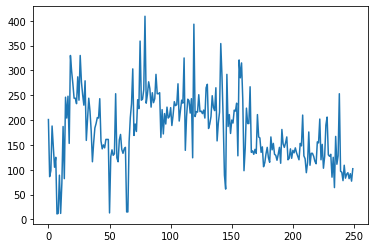

In [7]:
if __name__ == "__main__":
    cartpole = CartPole()
    outputs = cartpole.run()
    plt.plot(outputs)
    plt.show()